# How to extract data from the UK Biobank

#### Created by: Whitney Teagle

#### Contents
1. Create a Jupyter notebook
2. Download data from UKB
3. Find variables of interest
4. Create dataset from UKB

    4.a. Prepare environment
    
    4.b. Load UK Biobank raw dataset
        4.b.i. Making a dataset
        4.b.ii. Load the memory-efficient dataset
    4.c. Extract data from UK Biobank raw dataset
        4.c.i. Make a key
        4.c.ii. Demographics data
        4.c.iii. ICD-10 codes/Elixhauser Comorbidity Index
        4.c.iv. Mental health variables

## 1. Create a Jupyter notebook

Instructions for creating a Jupyter notebook in **Biowulf** can be found at this link: https://docs.google.com/document/d/1KcpIVK872sSxM-bsTOby6bvy_vBjqD-iLq2xTk67kv8/edit?usp=sharing

Instructions for creating a Jupyter notebook in Dr. Marino-Ramirez's **NIMHD server** forthcoming.

## 2. Download data from UKB

Instructions for downloading data from the UK Biobank website can be found at this link: https://docs.google.com/document/d/1ZSRnTi2BReB_-pdAQ9wP0KrNcfBGe5R1InLMK1yeaDI/edit?usp=sharing

## 3. Find variables of interest

Instructions for finding variables in the UK Biobank can be found at this link: https://docs.google.com/document/d/12riycl3c62PycuALKufnuIMGhGlF7hIG08BjS_ZmLWc/edit?usp=sharing

For more information as well as alternative ways to search for variables, categories, and data, see https://biobank.ndph.ox.ac.uk/ukb/ukb/exinfo/ShowcaseUserGuide.pdf

## 4. Create dataset from UK Biobank

### 4.a. Prepare environment

In [55]:
rm(list = ls()) # Clear environment

In [56]:
# Install required packages
install.packages(c('comorbidity', 
                   'ukbtools', 
                   'tidyverse', 
                   'tibble', 
                   'dplyr', 
                   'readr',
                   'data.table'))

Installing packages into ‘/spin1/home/linux/teaglewl/R/4.0/library’
(as ‘lib’ is unspecified)

Warning message in install.packages(c("comorbidity", "ukbtools", "tidyverse", "tibble", :
“installation of package ‘tibble’ had non-zero exit status”
Warning message in install.packages(c("comorbidity", "ukbtools", "tidyverse", "tibble", :
“installation of package ‘data.table’ had non-zero exit status”
Warning message in install.packages(c("comorbidity", "ukbtools", "tidyverse", "tibble", :
“installation of package ‘dplyr’ had non-zero exit status”
Warning message in install.packages(c("comorbidity", "ukbtools", "tidyverse", "tibble", :
“installation of package ‘readr’ had non-zero exit status”


In [57]:
# Load required packages
library(comorbidity)
library(ukbtools)
library(reshape2)
library(tidyverse)
library(tibble)
library(readr)
library(data.table)

### 4.b. Load UK Biobank raw dataset
Note: this step takes a while and requires lots of computing resources. If the Kernel keeps crashing, start over with more memory (like 100g instead of 10 when you allocate an interactive session in PuTTY).

If you are beginning with .r, .html, and .tab files, then follow the instructions located at https://cran.r-project.org/web/packages/ukbtools/vignettes/explore-ukb-data.html to get started. The following sections ultimately create a memory-efficient .rda file:
- Getting started
- Installing the package
- Making a dataset
- Making a key
- Memory and efficiency

These steps are outlined in section 4.b.i. and only need to be completed once.

Otherwise, proceed with the code in section 4.b.ii.

#### 4.b.i. Making a dataset

In [ ]:
# Returns a dataframe with usable column names
my_ukb_data <- ukb_df("ukb45856", path = "/data/teaglewl/ukbiobank/raw_data")

In [ ]:
# To reduce memory usage, save UKB dataset with the following code:
save(my_ukb_data, file = "/data/teaglewl/ukbiobank/raw_data/my_ukb_data.rda")

#### 4.b.ii. Load the memory-efficient dataset

In [75]:
# Load the memory-efficient dataset with the following code:
load("/data/teaglewl/ukbiobank/raw_data/my_ukb_data.rda") # Replace filepath

### 4.c. Extract data from UK Biobank raw dataset
More information, including functions and tools for extracting data from the UK Biobank, can be found at https://cran.r-project.org/web/packages/ukbtools/ukbtools.pdf.

#### 4.c.i. Make a key
The following code creates a data.frame with columns for data field names and descriptions. You will use this to find UKB column names as you create your dataset.

In [59]:
# Use ukb_df_field to create a field code-to-descriptive name key, as dataframe or named lookup vector.
my_ukb_key <- ukb_df_field("ukb45856", path = "/data/teaglewl/ukbiobank/raw_data")

#### ukb_df_field columns:

* **field.showcase** -- how the field appears in the online UKB showcase
* **field.html** -- how the field appears in the html file in your UKB fileset
* **field.tab** -- how the field appears in the tab file in your fileset
* **col.name** -- the descriptive name that ukb_df assigns to the variable

In [60]:
head(my_ukb_key)

field.showcase,field.html,field.tab,col.type,col.name
<chr>,<chr>,<chr>,<chr>,<chr>
eid,eid,f.eid,Sequence,eid
3,3-0.0,f.3.0.0,Integer,verbal_interview_duration_f3_0_0
3,3-1.0,f.3.1.0,Integer,verbal_interview_duration_f3_1_0
3,3-2.0,f.3.2.0,Integer,verbal_interview_duration_f3_2_0
3,3-3.0,f.3.3.0,Integer,verbal_interview_duration_f3_3_0
4,4-0.0,f.4.0.0,Integer,biometrics_duration_f4_0_0


#### 4.c.ii. Demographics data
UKB Primary Demographics can be found here: https://biobank.ctsu.ox.ac.uk/crystal/label.cgi?id=1001

###### Select fields of interest

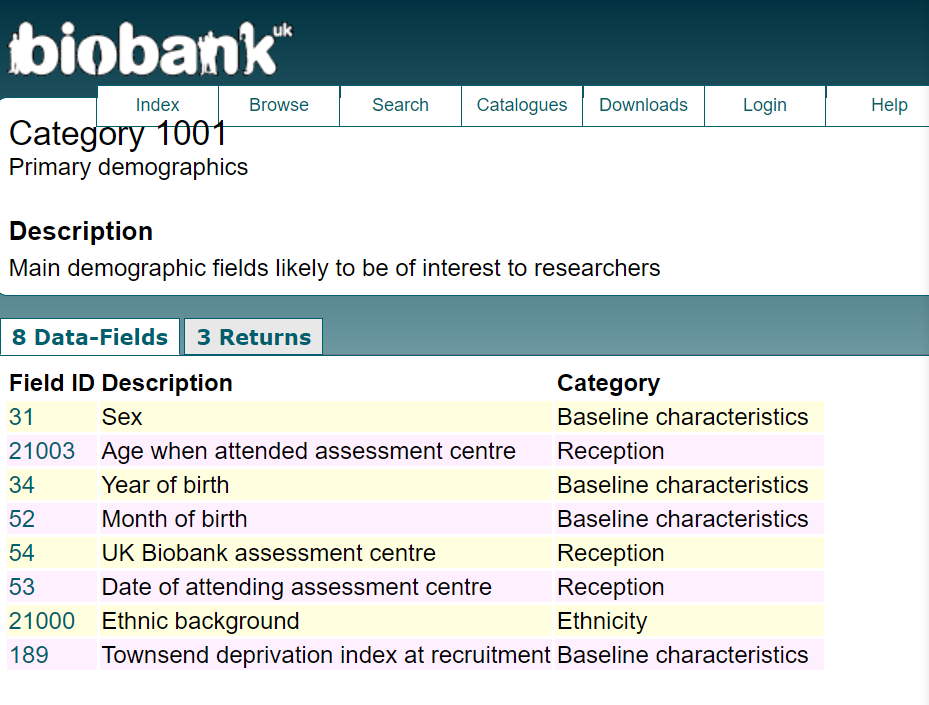

###### Create key

In [61]:
# Define variables of interest from your search in the UKB showcase 
demographics_vars_showcase <- c("eid", "31", "21003", "34", "52", "54", "53", "21000", "189") # These numbers come from the Field ID column
demographics_vars_showcase

[1] "eid"   "31"    "21003" "34"    "52"    "54"    "53"    "21000" "189"

In [62]:
# Using my_ukb_key, create a data.frame with the field.showcase values (which we already have) and the col.name values (which is what we will use to query the UKB raw data)
# demographics_vars_key <- my_ukb_key[my_ukb_key$field.showcase %in% demographics_vars_showcase] # This worked yesterday, but now is getting an error.
demographics_vars_key <- dplyr::filter(my_ukb_key,
             my_ukb_key$field.showcase %in% demographics_vars_showcase) # Whereas this didn't work yesterday. So, if this doesn't work in the future, try switching to the other way.

In [63]:
# Remove duplicate data (just keep unique field.showcase and col.name rows) and superfluous columns
demographics_vars_key <- demographics_vars_key[!duplicated(demographics_vars_key$col.name), ]
demographics_vars_key <- demographics_vars_key[,c("field.showcase", "col.name")]

In [64]:
# Check key
unique(demographics_vars_key$field.showcase) # Confirm values match selected values
demographics_vars_key

[1] "eid"   "31"    "34"    "52"    "53"    "54"    "189"   "21000" "21003"

field.showcase,col.name
<chr>,<chr>
eid,eid
31,sex_f31_0_0
34,year_of_birth_f34_0_0
52,month_of_birth_f52_0_0
53,date_of_attending_assessment_centre_f53_0_0
53,date_of_attending_assessment_centre_f53_1_0
53,date_of_attending_assessment_centre_f53_2_0
53,date_of_attending_assessment_centre_f53_3_0
54,uk_biobank_assessment_centre_f54_0_0


###### Create demographics dataset

In [69]:
# Using demographics_vars_key, create a data.frame with only UKB data fields found in demographics_vars_key
demographics_data <- select(my_ukb_data, matches(demographics_vars_key$col.name))

In [79]:
# Save dataset as .txt file
write.table(demographics_data, 
            file = "ukb-data-extraction-demo-df-demographics.txt", # Saves into the current working directory. To specify otherwise, include the filepath in the file variable.
            sep = "\t", 
            quote = FALSE, 
            row.names = FALSE) 

In [80]:
# Example code that loads a previously saved .txt file dataset
dem_data <- read.table(file = "ukb-data-extraction-demo-df-demographics.txt", # Include full filepath if necessary
                                  sep = "\t",
                                  header = TRUE)
head(dem_data, 5)

,eid,sex_f31_0_0,year_of_birth_f34_0_0,month_of_birth_f52_0_0,date_of_attending_assessment_centre_f53_0_0,date_of_attending_assessment_centre_f53_1_0,date_of_attending_assessment_centre_f53_2_0,date_of_attending_assessment_centre_f53_3_0,uk_biobank_assessment_centre_f54_0_0,uk_biobank_assessment_centre_f54_1_0,uk_biobank_assessment_centre_f54_2_0,uk_biobank_assessment_centre_f54_3_0,townsend_deprivation_index_at_recruitment_f189_0_0,ethnic_background_f21000_0_0,ethnic_background_f21000_1_0,ethnic_background_f21000_2_0,age_when_attended_assessment_centre_f21003_0_0,age_when_attended_assessment_centre_f21003_1_0,age_when_attended_assessment_centre_f21003_2_0,age_when_attended_assessment_centre_f21003_3_0
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,1000017,Male,1943,May,2010-03-18,NA,NA,NA,11014,NA,NA,NA,-3.8801100,British,NA,NA,66,NA,NA,NA
2,1000025,Male,1941,May,2009-10-12,NA,NA,NA,11020,NA,NA,NA,0.3249240,Any other Asian background,NA,NA,68,NA,NA,NA
3,1000038,Female,1942,August,2009-03-25,NA,NA,NA,11011,NA,NA,NA,-0.0789324,British,NA,NA,66,NA,NA,NA
4,1000042,Female,1957,December,2008-10-20,NA,NA,NA,11011,NA,NA,NA,1.4941200,British,NA,NA,50,NA,NA,NA
5,1000056,Female,1943,December,2010-02-16,NA,NA,NA,11016,NA,NA,NA,6.2030600,British,NA,NA,66,NA,NA,NA


#### 4.c.iii. ICD-10 codes/Elixhauser Comorbidity Index
The [comorbidity package](https://cran.r-project.org/web/packages/comorbidity/comorbidity.pdf) was used to generate the Elixhauser Comorbidity Index dataset used in this example.

In [5]:
# Create dataset with only variables which have "ICD10" in the colname
ukb_subset_ICD10 <- my_ukb_data[ , grepl("icd10", names(my_ukb_data))]
colnames_ICD10 <- colnames(ukb_subset_ICD10)
ukb_subset_ICD10_eid <- my_ukb_data[c('eid', colnames_ICD10)]

In [6]:
# Drop columns with "date" in the colname
ukb_nodate <- ukb_subset_ICD10_eid[, !grepl("date", names(ukb_subset_ICD10_eid))]

In [7]:
# Via 'melt' function, turn the dataset into two columns (eid and ICD-10 values) for use with comorbidity package
melted_data <- melt(ukb_nodate, id.vars = 'eid') # not renaming "value" column
head(melted_data, 5)

,eid,variable,value
,<int>,<fct>,<chr>
1,1000017,underlying_primary_cause_of_death_icd10_f40001_0_0,NA
2,1000025,underlying_primary_cause_of_death_icd10_f40001_0_0,NA
3,1000038,underlying_primary_cause_of_death_icd10_f40001_0_0,C19
4,1000042,underlying_primary_cause_of_death_icd10_f40001_0_0,NA
5,1000056,underlying_primary_cause_of_death_icd10_f40001_0_0,NA


In [ ]:
# Optional: save a temp data file (my kernel kept dying)
write.table(melted_data, 
            file = "temp_data.txt", 
            sep = "\t", 
            quote = FALSE, 
            row.names = FALSE) # Saves into the current working directory. To specify otherwise, include the filepath in the file variable.

In [5]:
# Optional pt. 2: read the temp data file
melted_data <- read.table(file = "temp_data.txt", # Include full filepath if necessary
                                  sep = "\t",
                                  header = TRUE)

In [6]:
# Compute Elixhauser comorbidity scores
elixhauser <- comorbidity(x = melted_data, 
                          id = "eid", 
                          code = "value", 
                          score = "elixhauser", 
                          icd = "icd10", 
                          assign0 = FALSE)
head(elixhauser, 5)

,eid,chf,carit,valv,pcd,pvd,hypunc,hypc,para,ond,⋯,alcohol,drug,psycho,depre,score,index,wscore_ahrq,wscore_vw,windex_ahrq,windex_vw
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,1000017,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,3,1-4,21,10,>=5,>=5
2,1000025,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,2,1-4,-3,0,<0,0
3,1000038,0,0,1,0,0,0,0,0,0,⋯,0,0,1,1,6,>=5,6,3,>=5,1-4
4,1000042,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,1000056,0,0,0,0,0,1,0,0,0,⋯,0,0,0,0,3,1-4,2,3,1-4,1-4


In [7]:
# Save dataset as .txt file
write.table(elixhauser, 
            file = "ukb-data-extraction-demo-df-elixhauser.txt", # Saves into the current working directory. To specify otherwise, include the filepath in the file variable.
            sep = "\t", 
            quote = FALSE, 
            row.names = FALSE) 

#### 4.c.iv. Mental health variables

First, navigate to the UK Biobank data showcase as described in part 3 ("Find variables of interest"). Click on Browse data.

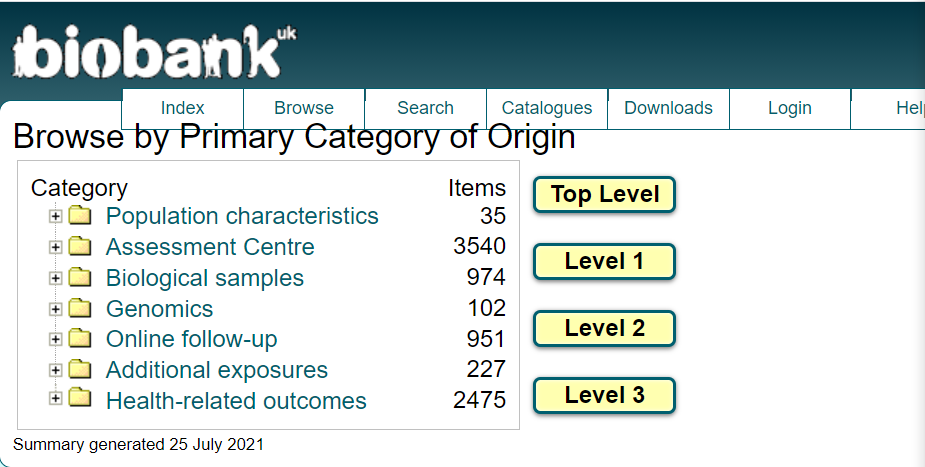

For this demonstration, I selected the following variables:
* Duration of worst depression
* Recent feelings of depression
* Substances taken for depression

These variables were found in **Online follow-up** --> **Mental health** --> **Depression**
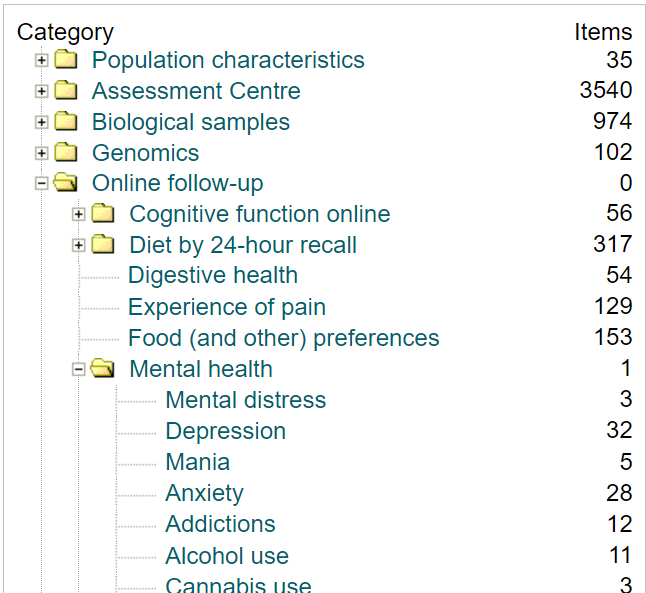

In the following screenshot, numbers refer to the variable Field ID and text is the variable Description. You can find this by clicking on the "Depression" category from the previous page.
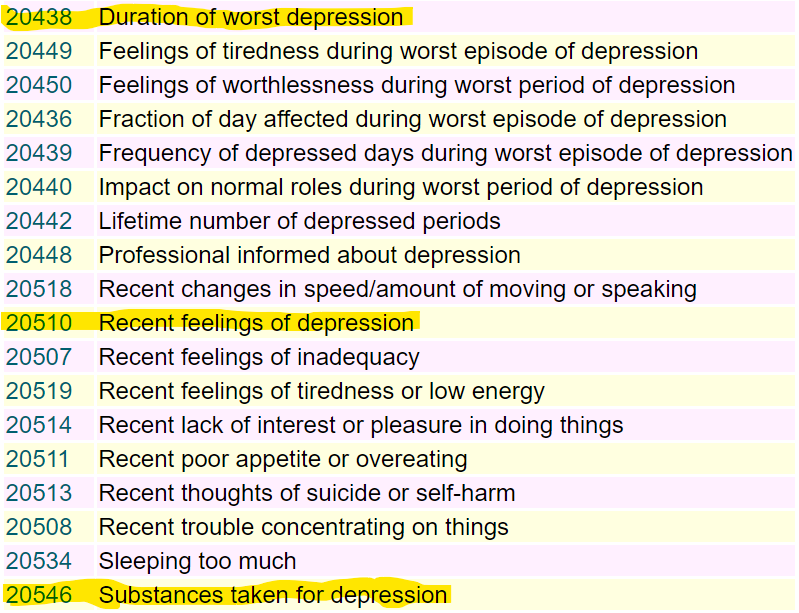

###### Create key

In [81]:
# Define variables of interest from your search in the UKB showcase 
depression_vars_showcase <- c("eid", "20438", "20510", "20546") # These numbers come from the Field ID column
depression_vars_showcase

[1] "eid"   "20438" "20510" "20546"

In [83]:
# Using my_ukb_key, create a data.frame with the field.showcase values (which we already have) and the col.name values (which is what we will use to query the UKB raw data)
depression_vars_key <- dplyr::filter(my_ukb_key,
             my_ukb_key$field.showcase %in% depression_vars_showcase)

In [84]:
# Remove duplicate data (just keep unique field.showcase and col.name rows) and superfluous columns
depression_vars_key <- depression_vars_key[!duplicated(depression_vars_key$col.name), ]
depression_vars_key <- depression_vars_key[,c("field.showcase", "col.name")]

In [85]:
# Check key
unique(depression_vars_key$field.showcase) # Confirm values match selected values
depression_vars_key

[1] "eid"   "20438" "20510" "20546"

field.showcase,col.name
<chr>,<chr>
eid,eid
20438,duration_of_worst_depression_f20438_0_0
20510,recent_feelings_of_depression_f20510_0_0
20546,substances_taken_for_depression_f20546_0_1
20546,substances_taken_for_depression_f20546_0_2
20546,substances_taken_for_depression_f20546_0_3


###### Create mental health - depression dataset

In [86]:
# Using depression_vars_key, create a data.frame with only UKB data fields found in depression_vars_key
depression_data <- select(my_ukb_data, matches(depression_vars_key$col.name))

In [87]:
# Save dataset as .txt file
write.table(depression_data, 
            file = "ukb-data-extraction-demo-df-depression.txt", # Saves into the current working directory. To specify otherwise, include the filepath in the file variable.
            sep = "\t", 
            quote = FALSE, 
            row.names = FALSE) 

In [88]:
head(depression_data)

,eid,duration_of_worst_depression_f20438_0_0,recent_feelings_of_depression_f20510_0_0,substances_taken_for_depression_f20546_0_1,substances_taken_for_depression_f20546_0_2,substances_taken_for_depression_f20546_0_3
,<int>,<ord>,<ord>,<ord>,<ord>,<ord>
1,1000017,NA,NA,NA,NA,NA
2,1000025,NA,NA,NA,NA,NA
3,1000038,NA,NA,NA,NA,NA
4,1000042,NA,Not at all,NA,NA,NA
5,1000056,NA,NA,NA,NA,NA
6,1000061,Prefer not to answer,Not at all,NA,NA,NA


In [101]:
# Example code creating data.frame with 'eid', 'variable', and 'value' columns
melted_data <- reshape2::melt(depression_data, id.vars = 'eid') # More info about warning message here: https://stackoverflow.com/questions/25688897/reshape2-melt-warning-message
head(melted_data)

Warning message:
“attributes are not identical across measure variables; they will be dropped”


,eid,variable,value
,<int>,<fct>,<chr>
1,1000017,duration_of_worst_depression_f20438_0_0,NA
2,1000025,duration_of_worst_depression_f20438_0_0,NA
3,1000038,duration_of_worst_depression_f20438_0_0,NA
4,1000042,duration_of_worst_depression_f20438_0_0,NA
5,1000056,duration_of_worst_depression_f20438_0_0,NA
6,1000061,duration_of_worst_depression_f20438_0_0,Prefer not to answer


### Misc

Note: Based on this video, it also looks like there is a program for intuitively creating cohorts similar to the All of Us project: https://www.youtube.com/watch?v=mNRR7yNAg7s&ab_channel=DNAnexus